<a href="https://colab.research.google.com/github/vicensi/Deep-learning/blob/main/BBAS3_sequencial_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
import pydot
from tensorflow.keras.optimizers import Adam
from pandas import read_csv
from datetime import datetime
import plotly.graph_objs as go
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [ ]:
#Carrega o dataset
#international airline passengers problem with time step regression framing

dataframe_teste = read_csv('/content/drive/MyDrive/Pasta sem nome/deep learnig/BBAS3.SA/teste.csv', usecols =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], engine='python')
dataframe_treino = read_csv('/content/drive/MyDrive/Pasta sem nome/deep learnig/BBAS3.SA/treino.csv', usecols =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], engine='python')
dataframe_treino.head(150)

,Date,Close,Smoothed_Close,Label,Past_1_Days_Close,Past_2_Days_Close,Past_3_Days_Close,Past_4_Days_Close,Past_5_Days_Close,Past_6_Days_Close,Past_7_Days_Close,Past_8_Days_Close,Past_9_Days_Close,Past_10_Days_Close,Past_11_Days_Close,Past_12_Days_Close,Past_13_Days_Close,Past_14_Days_Close,Past_15_Days_Close
0,2000-01-24,1.062769,1.071645,-1,1.088979,1.079805,1.086357,1.098152,1.069322,1.061459,1.062769,1.081116,1.066701,1.081116,1.024767,1.048355,1.033940,1.023457,1.074564
1,2000-01-26,1.087668,1.073247,-1,1.062769,1.088979,1.079805,1.086357,1.098152,1.069322,1.061459,1.062769,1.081116,1.066701,1.081116,1.024767,1.048355,1.033940,1.023457
2,2000-01-27,1.064080,1.072330,-1,1.087668,1.062769,1.088979,1.079805,1.086357,1.098152,1.069322,1.061459,1.062769,1.081116,1.066701,1.081116,1.024767,1.048355,1.033940
3,2000-01-28,1.036561,1.068753,-1,1.064080,1.087668,1.062769,1.088979,1.079805,1.086357,1.098152,1.069322,1.061459,1.062769,1.081116,1.066701,1.081116,1.024767,1.048355
4,2000-01-31,1.035250,1.065403,-1,1.036561,1.064080,1.087668,1.062769,1.088979,1.079805,1.086357,1.098152,1.069322,1.061459,1.062769,1.081116,1.066701,1.081116,1.024767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2000-08-24,0.824269,0.825351,-1,0.825580,0.819027,0.815096,0.816406,0.834753,0.800681,0.833442,0.843925,0.838684,0.822958,0.837374,0.839994,0.828200,0.813785,0.834753
146,2000-08-25,0.838684,0.826684,-1,0.824269,0.825580,0.819027,0.815096,0.816406,0.834753,0.800681,0.833442,0.843925,0.838684,0.822958,0.837374,0.839994,0.828200,0.813785
147,2000-08-28,0.838684,0.827884,-1,0.838684,0.824269,0.825580,0.819027,0.815096,0.816406,0.834753,0.800681,0.833442,0.843925,0.838684,0.822958,0.837374,0.839994,0.828200
148,2000-08-29,0.837374,0.828833,1,0.838684,0.838684,0.824269,0.825580,0.819027,0.815096,0.816406,0.834753,0.800681,0.833442,0.843925,0.838684,0.822958,0.837374,0.839994


[]

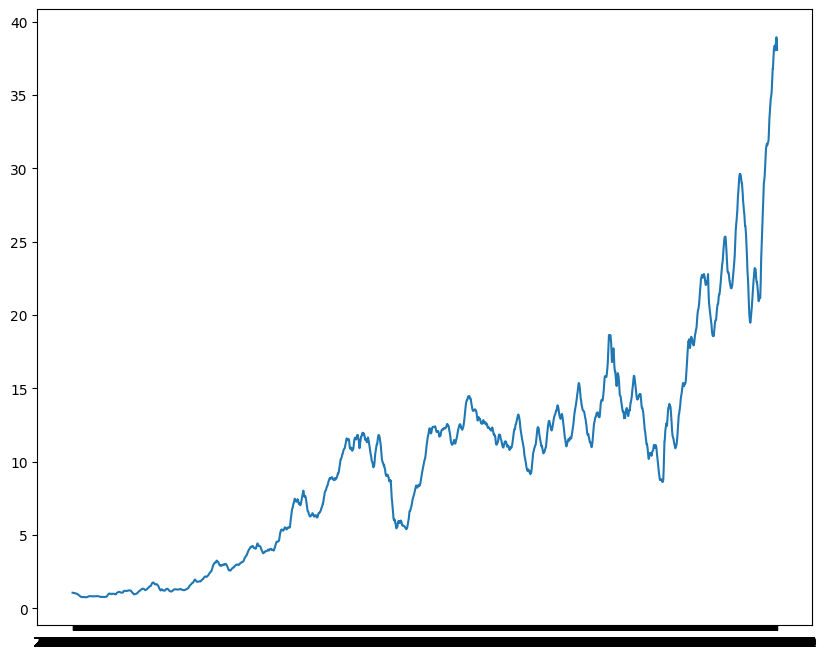

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(dataframe_treino.Date, dataframe_treino.Smoothed_Close)
plt.plot()

In [ ]:
#Normaliza o dataset
# Selecionar todas as colunas exceto a coluna especificada
new_teste = dataframe_teste.drop(['Date','Smoothed_Close','Close'], axis=1)
new_treino = dataframe_treino.drop(['Date','Smoothed_Close','Close'], axis=1)
new_teste['Label'] = new_teste['Label'].replace(-1, 0)
new_treino['Label'] = new_treino['Label'].replace(-1, 0)
# Acessar os valores das colunas selecionadas usando loc e values
# Extraindo as características e os rótulos
X_data_treino = new_treino.iloc[:, 1:].values  # Todas as colunas exceto a primeira
X_data_teste = new_teste.iloc[:, 1:].values

y_data_train = new_treino.iloc[:, 0].values   # Apenas a primeira coluna
y_data_test = new_teste.iloc[:, 0].values


X_treino = X_data_treino.astype('float32')
X_teste = X_data_teste.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))

#scaler = StandardScaler()
X_teste = scaler.fit_transform(X_teste)
X_treino = scaler.fit_transform(X_treino)

In [ ]:
X_treino.shape

(4735, 15)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=15, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2048      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10369 (40.50 KB)
Trainable params: 10369 (40.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


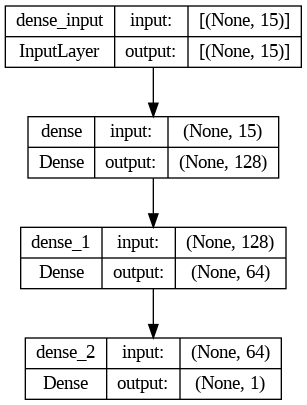

In [ ]:
print(model.summary())

plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history  = model.fit(X_treino, y_data_train, epochs=100, batch_size=100)

Epoch 1/100
48/48 [==============================] - 3s 4ms/step - loss: 0.6829 - accuracy: 0.5590
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.5964
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6459 - accuracy: 0.6378
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.6881
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.7153
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5434 - accuracy: 0.7559
Epoch 7/100
48/48 [==============================] - 0s 4ms/step - loss: 0.5117 - accuracy: 0.7818
Epoch 8/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.7711
Epoch 9/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.7935
Epoch 10/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4475 - accuracy: 0.8078
Epoch 11/

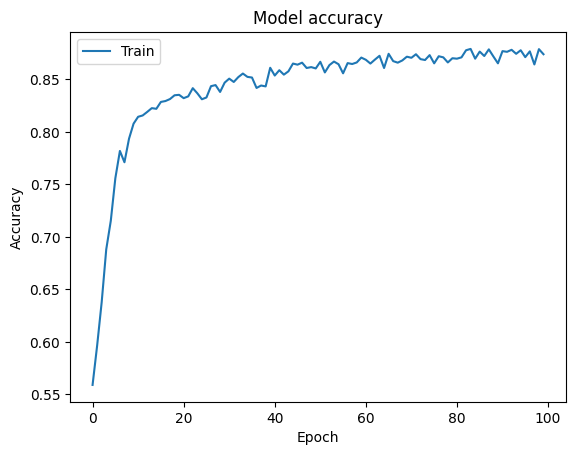

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

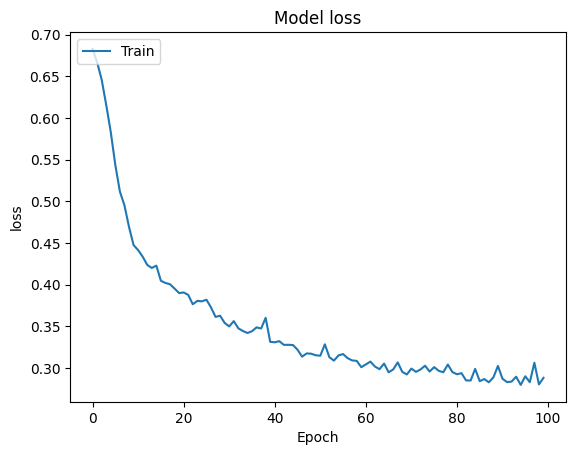

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Predições
trainPredict = model.predict(X_treino)
testPredict = model.predict(X_teste)

38/38 [==============================] - 0s 3ms/step


In [ ]:
testPredict[:10]

array([[8.1691303e-12],
       [3.1207328e-10],
       [2.8597616e-17],
       [1.6162289e-21],
       [1.1547023e-19],
       [4.3889537e-13],
       [1.8425331e-11],
       [2.7929550e-10],
       [4.2675833e-07],
       [5.7606481e-05]], dtype=float32)

In [ ]:
test_pred = (testPredict > 0.5).astype(int)
test_pred[:50]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

38/38 [==============================] - 0s 4ms/step - loss: 0.2973 - accuracy: 0.8819
Model Accuracy: 88.19%
38/38 [==============================] - 0s 2ms/step


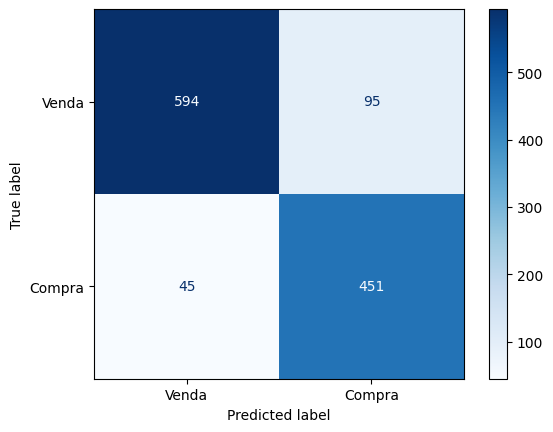

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Avaliação do Modelo
loss, accuracy = model.evaluate(X_teste, y_data_test)
print(f'Model Accuracy: {accuracy*100:.2f}%')

# Predição
predictions = model.predict(X_teste)
predicted_labels = (predictions > 0.5).astype(int)


# Calcular a matriz de confusão
cm = confusion_matrix(y_data_test, predicted_labels)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Venda', 'Compra'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
colunas_selecionadas = ['Date', 'Label', 'Smoothed_Close']
novo_df = dataframe_teste[colunas_selecionadas]

In [ ]:
novo_df.rename(columns={'Label': 'Label_Original'}, inplace = True)

<ipython-input-16-599f18337068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_df.rename(columns={'Label': 'Label_Original'}, inplace = True)


In [ ]:
predicted_labels

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
# Converter o numpy.ndarray de volta para um pandas.DataFrame
colunas =['Label']
predicted_dataframe = pd.DataFrame(predicted_labels, columns=colunas)
predicted_dataframe

,Label
0,0
1,0
2,0
3,0
4,0
...,...
1180,1
1181,1
1182,1
1183,1


In [ ]:
# Concatenando os DataFrames
df_concatenado = pd.concat([novo_df, predicted_dataframe],axis=1)

In [ ]:
df_concatenado['Label_Original'] = df_concatenado['Label_Original'].replace(-1, 0)

In [ ]:
df_concatenado

,Date,Label_Original,Smoothed_Close,Label
0,2019-03-26,0,37.917648,0
1,2019-03-27,0,37.563014,0
2,2019-03-28,0,37.363844,0
3,2019-03-29,0,37.236446,0
4,2019-04-01,0,37.157342,0
...,...,...,...,...
1180,2023-12-21,1,53.331493,1
1181,2023-12-22,1,53.442343,1
1182,2023-12-26,1,53.592109,1
1183,2023-12-27,1,53.718898,1


In [ ]:
# Implementar estratégia de compra e venda
def backtest(data, predictions):
    capital = 1000  # Capital inicial
    acoes = 0  # Quantidade de ações em posse
    capital_hist = [capital]  # Histórico do capital ao longo do tempo
    real_values = []  # Valores reais das ações ao longo do tempo
    predictions_values = []  # Previsões de compra e venda ao longo do tempo

    for index, row in data.iterrows():
        if predictions[index] == 1:
            acoes += capital / row['Smoothed_Close']
            capital = 0
        elif predictions[index] == 0:
            capital += acoes * row['Smoothed_Close']
            acoes = 0

        capital_hist.append(capital + acoes * row['Smoothed_Close'])
        real_values.append(row['Smoothed_Close'])
        predictions_values.append(predictions[index])

    return capital_hist, real_values, predictions_values

historico_capital, real_values, predictions_values = backtest(df_concatenado, predicted_labels)

In [ ]:
historico_capital = np.array(historico_capital)
historico_capital

array([1000.        , 1000.        , 1000.        , ..., 6181.6312526 ,
       6196.25586736, 6215.53134048])

In [ ]:
Smoothed_Close = df_concatenado.Smoothed_Close.values
Smoothed_Close

array([37.91764847, 37.5630136 , 37.36384381, ..., 53.59210883,
       53.71889801, 53.88600815])

In [ ]:
Date = df_concatenado.Date.values
Date

array(['2019-03-26', '2019-03-27', '2019-03-28', ..., '2023-12-26',
       '2023-12-27', '2023-12-28'], dtype=object)

In [ ]:
Label_Original = df_concatenado.Label_Original.values
Label_Original

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#criado um array com os label original
buy_signals_original = np.full(len(Label_Original), np.nan)
sell_signals_original = np.full(len(Label_Original), np.nan)

# Preencher os arrays de compra e venda com base nos sinais
for i in range(len(Label_Original)):
    if Label_Original[i] == 1:
        buy_signals_original[i] = Smoothed_Close[i]
    elif Label_Original[i] == 0:
        sell_signals_original[i] = Smoothed_Close[i]

In [ ]:
#criado um array com os label previstos
buy_signals_previsto = np.full(len(predicted_labels), np.nan)
sell_signals_previsto = np.full(len(predicted_labels), np.nan)

# Preencher os arrays de compra e venda com base nos sinais
for i in range(len(predicted_labels)):
    if predicted_labels[i] == 1:
        buy_signals_previsto[i] = Smoothed_Close[i]
    elif predicted_labels[i] == 0:
        sell_signals_previsto[i] = Smoothed_Close[i]

In [ ]:
#CODIgo para o plotly
import plotly.graph_objs as go
fig = go.Figure()

# Criar o gráfico da série temporal
fig = go.Figure()

# Adicionar a linha de valor de fechamento
fig.add_trace(go.Scatter(x=Date, y=Smoothed_Close, mode='lines', name='Closed Value'))

# original
# Adicionar pontos de compra
fig.add_trace(go.Scatter(x=Date, y=buy_signals_original, mode='markers', name='Buy Signal', marker=dict(color='green', size=8, symbol='triangle-up')))
# Adicionar pontos de venda
fig.add_trace(go.Scatter(x=Date, y=sell_signals_original, mode='markers', name='Sell Signal', marker=dict(color='red', size=8, symbol='triangle-down')))


# Previsto
# Adicionar pontos de compra
fig.add_trace(go.Scatter(x=Date, y=buy_signals_previsto, mode='markers', name='Buy Signal previsto', marker=dict(color='yellow', size=8, symbol='triangle-up')))

# Adicionar pontos de venda
fig.add_trace(go.Scatter(x=Date, y=sell_signals_previsto, mode='markers', name='Sell Signal previsto', marker=dict(color='pink', size=8, symbol='triangle-down')))

# valor
fig.add_trace(go.Scatter(x=Date, y=historico_capital, mode='lines', name='Capital ao longo do tempo',yaxis='y2'))


# Configurar layout para usar dois eixos y
fig.update_layout(
    title='Desempenho do modelo via backtest',
    xaxis_title='Período',
    yaxis=dict(
        title='Valor do Ativo',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Capital',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.0)
)

fig.show()